<a href="https://colab.research.google.com/github/Akshaypakhle10/ML/blob/master/An_Eye_for_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Developing An Eye for Fashion


This is an interactive example of a machine learning task handled well by a neural network.

We will proceed through the sections in this notebook stopping to play with options and discuss the various decisions that are necessary in developing a neural network.

This is adapted from the TF example https://www.tensorflow.org/tutorials/keras/classification


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#!pip install matplotlib
#!pip install tensorflow==2.0.0
!pip install helpers

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

print(f"TF version: {tf.__version__} -------------- ur g2g")

TF version: 1.15.0 -------------- ur g2g


## 1. Preparing the Data 

This is almost always the most time consuming portion of data science, but we will skim right over it here.

We load the data, splitting it into a training set and a test set.

Why do we do this? Imagine if your mechanics professor gave you every problem on the final exam as a problem set. You'd score very highly on the exam, but that score would not say much about your ability to perform on an unseen problem.

The reasoning for ML is analagous.

In [2]:
dataset_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = dataset_mnist.load_data()

print(f"The training set has shape {train_images.shape}" + "\n")
print(f"The test set has shape {test_images.shape}" + "\n")

4423680/4422102 [==============================] - 0s 0us/step
The training set has shape (60000, 28, 28)

The test set has shape (10000, 28, 28)



Let's assign labels to the various types of clothes in this dataset. By inspection there are 10 classes. 

We also divide each element in the image array by the maximum value to ensure that each value is 

In [0]:
# Fill in the 10 classes of clothing a name.

class_names = ['Tshirt', 'Pants', 'Sweatshirt', 'Dress', 'Jacket', 'Heels', 'Shirt', 'Shoes', 'Bag', 'Sneakers']

train_images = train_images / 255.0

test_images = test_images / 255.0

## DISCUSS: Why divide by the maximum element of the input vectors? 

The feature vectors encode pixel intensity with an integer in [0, 255]. Dividing by the maximum is one way of implementing something called feature scaling.

1. With a partner or two, write down a few ideas on why this might be worthwhile.
   
    
2. Imagine if this dataset had images taken in varying lighting conditions, where some images are relatively dark or bright. How could we use feature scaling to help the model learn to recognize shoes in any amount of light?


Here is a sample of 25 images for the dataset. Do the labels you wrote describe the items well? Feel free to tweak them above.

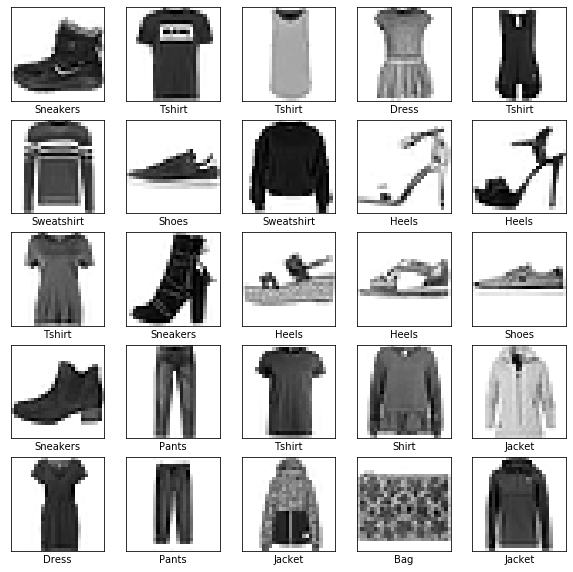

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 2. Building the Model

The syntax of TensorFlow is a little opaque, so do not work too hard trying to parse it. 


We build the model by specifying the shape of the input and the number of possible categories to output, or that exist in the labelled data.

The choices in the intermediate layer are up to us. There is no right answer here, and one of the difficulties of deep learning is how computationally expensive and time consuming it is to choose these so-called "hyperparameters."

In [5]:
input_shape = (28, 28)  # The shape of the data. This cannot be changed.
num_categories = 10 # The number of labelled categories in our classification scheme. This cannot be changed.

hidden_units_list = [16, 64, 256]
num_hidden_units = hidden_units_list[2] # This is the number of neurons in the hidden layer of the neural network
activation_list = ['sigmoid', 'relu', 'tanh'] # Different options of activation function
activation = activation_list[2]

model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(num_hidden_units, activation=activation),
    keras.layers.Dense(num_categories, activation='softmax')
])

print(f"The model is built using {num_hidden_units} hidden units and a {activation} activation function")



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
The model is built using 256 hidden units and a tanh activation function


## DISCUSS: Designing a hidden layer

1. Coordinate with a partner or two and choose 1 value for num_hidden_units each.
    How will this change the performance of the model? Will it affect the time it takes to train?
    
2. In the same way, select 1 activation function to use.
    How will this change the performance of the model? Will it affect the time it takes to train?
    
Write down your thoughts on the options given above and refer to them as we compare results.

We compile the model by prescribing an optimization method, a loss function, and a metric to measure performance.

All of these have effects on the resulting function and there is room for much exploration amoung these parameters, but we will not go into it here.

In [6]:
model.compile(optimizer='adam', # adam is an adaptive gradient optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 87us/sample - loss: 1.7042 - acc: 0.7619
Epoch 2/30
60000/60000 [==============================] - 4s 65us/sample - loss: 1.6392 - acc: 0.8238
Epoch 3/30
60000/60000 [==============================] - 4s 63us/sample - loss: 1.6040 - acc: 0.8593
Epoch 4/30
60000/60000 [==============================] - 4s 65us/sample - loss: 1.5965 - acc: 0.8668
Epoch 5/30
60000/60000 [==============================] - 4s 62us/sample - loss: 1.5906 - acc: 0.8722
Epoch 6/30
60000/60000 [==============================] - 4s 63us/sample - loss: 1.5848 - acc: 0.8777
Epoch 7/30
60000/60000 [==============================] - 4s 62us/sample - loss: 1.5827 - acc: 0.8803
Epoch 8/30
60000/60000 [==============================] - 4s 61us/sample - loss: 1.5786 - acc: 0.8845
Epoch 9/30
60000/60000 [==============================] - 4s 62us/sample - loss: 1.5760 - acc: 0.8870
Epoch 10/30
60000/60000 [==============================] - 

## 3. Examine Output

The model has been fit to the training data, so we can now see how well it performs on the test we prepared for it.

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 1.5873 - accuracy: 0.8613

Test accuracy: 0.8613


## DISCUSS: Compare results

1. How does the test accuracy compare to the test accuracy? Is the size of this gap independent of hidden layer design?

2. How about the training time per example?

We can use the trained model as a function which takes 28 x 28 pixel images and classifies them as a type of clothing. The output of the function is a 10-dimensional vector where each component corresponds to the 'probability' that the image is in that respective class.

In [0]:
predictions = model.predict(test_images)
predictions[0]

array([2.4910682e-07, 6.0833859e-11, 9.7519724e-08, 1.6712197e-04,
       5.1587984e-05, 5.0160363e-03, 3.9355755e-06, 3.6719143e-03,
       3.6040918e-05, 9.9105304e-01], dtype=float32)

In [0]:
f"This object is a {class_names[np.argmax(predictions[0])]}"

'This object is a 9'

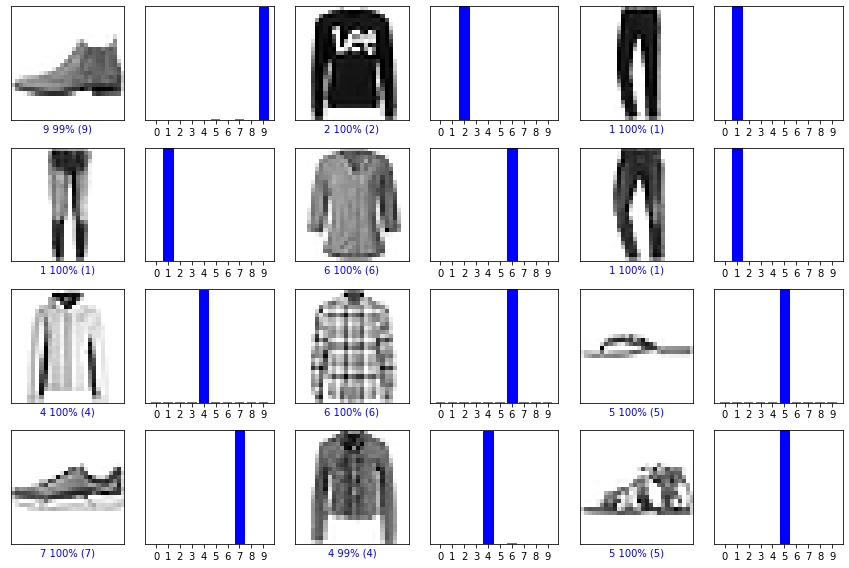

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images, class_names)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 4. Visualizing the Hidden Layer

The hidden layer contains the 'magic' of a neural network. 

The hierarchical structure of the network allows useful combinations of features to be encoded during training. In other words, the NN determines it's own features out of the raw features we feed it. 

The hidden weights describe the linear transformations between layers in the network. The first set of hidden weights correspond to the vector multiplied against the input vector to feed into the activation function of each neuron in the hidden layer.



In [0]:
hidden_weights = model.get_weights()[0]

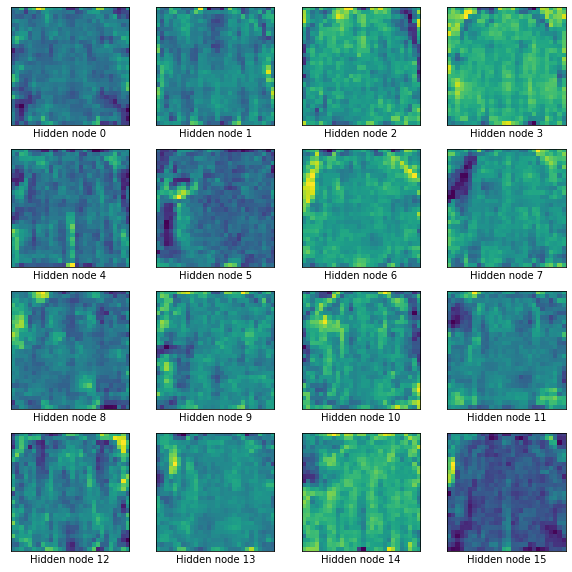

In [0]:
i = 0
plt.figure(figsize=(10,10))
filter_indices = np.sort(np.random.choice(range(num_hidden_units), 16, replace=False))
for filter_index in filter_indices:
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(hidden_weights[:,filter_index].reshape((28,28))*255, cmap='viridis')
    plt.xlabel(f"Hidden node {filter_index}")
    i += 1
plt.show()
    


## DISCUSS: Different Hidden Layers Learn Differently
    1. Are there any clear patterns that are being selected (shoulders, pant legs, shoe soles, etc.) 
    
    2. Compare the filters learned by your NN to that of a partner's. How does the number of hidden units seem to affect the filters?

    3. Does the choice of activation function change this?